In [4]:
from SALib.analyze import morris
from SALib.sample.morris import sample
from SALib.plotting.morris import (
    horizontal_bar_plot,
    covariance_plot,
    sample_histograms,
)
import matplotlib.pyplot as plt
import numpy as np
import pysd

In [5]:
model = pysd.read_vensim('innovation sd.mdl')

In [6]:
def evaluate_model(problem, model_parameter, return_columns=['profit per week']):
    # Generate samples
    param_values = sample(problem, N=100, num_levels=4, optimal_trajectories=None)
    Y = np.zeros([param_values.shape[0]])
    for i, X in enumerate(param_values):
        for j, param in enumerate(problem['names']):
            model_parameter[param] = X[j]
        # Run the simulation with the random parameter values
        result = model.run(params=model_parameter, return_columns=return_columns)
        Y[i] = np.average(result[return_columns[0]])
    return param_values, Y


In [7]:
model_parameter = {
    'hd': 6,
    'td': 10,
    'hrec': 4,
    'k': 0,
    'km1': 0,
    'km2': 0,
    'km3': 0,
    'km4': 0,
    'km5': 0,
    '"kused-prod"': 0,
    'krmsi': 0,
    'kp': 0,
    'kppi': 0,
    'kd': 0,
    'krpi': 0,
    'kc': 0,
    'kci': 0,
    '"%reduction of demand"': 0.5
    # Add more parameters as needed
}

problem = {
    'num_vars': 3,
    'names': ['"%reduction of demand"', '"%reduction of oc"', 'initial mean value'],
    'bounds': [[0, 1], [0,1], [5000, 15000]],
    'groups': None,
}

In [8]:
X,Y = evaluate_model(problem, model_parameter, ['Profit per week'])

print(Y)

[147771.56888161 141196.58233813 299774.88376072 334923.55936196
 298621.79427014 339010.25557238 154636.10598388 156761.41168684
 525727.75124738 658257.05232719 662426.03196675 232740.36717726
 209556.67493394 203113.15129391 230531.74059134 584633.19399782
 219721.06716072 526254.58912317 532751.41407819 650074.44832636
 527769.02474558 658327.36120172 231609.43791547 230937.56682956
 151191.58097755 317038.2996165  319608.14173593 288556.313363
 207480.18112807 498895.09566224 489485.80923828 588180.94951711
 659683.80180196 233872.42482705 216579.69779764 215052.65915476
 528359.37344666 219399.44937567 219744.66408858 237475.92034394
 586014.87918193 231038.27146192 228170.56127759 209249.58176241
 139037.92601349 286455.92942453 318962.84233679 321416.16963498
 134630.77313046 146752.62130998 149898.83891038 320483.99538222
 219902.62894221 217400.19872682 523275.02215711 659848.29745964
 211411.94167444 234842.78531003 583343.15069456 585669.18230425
 285095.3405626  136262.791

In [24]:
Si = morris.analyze(
    problem,
    X,
    Y,
    conf_level=0.9,
    print_to_console=True,
    num_levels=4,
    num_resamples=100,
)

                                   mu        mu_star          sigma  \
"%reduction of demand"  -66225.551468   66225.551468   60697.281340   
"%reduction of oc"        -293.061581    5639.898545    7133.565179   
initial mean value      387584.285167  387584.285167  148348.018417   

                        mu_star_conf  
"%reduction of demand"   9819.844268  
"%reduction of oc"        696.096443  
initial mean value      23935.544894  


<Axes: >

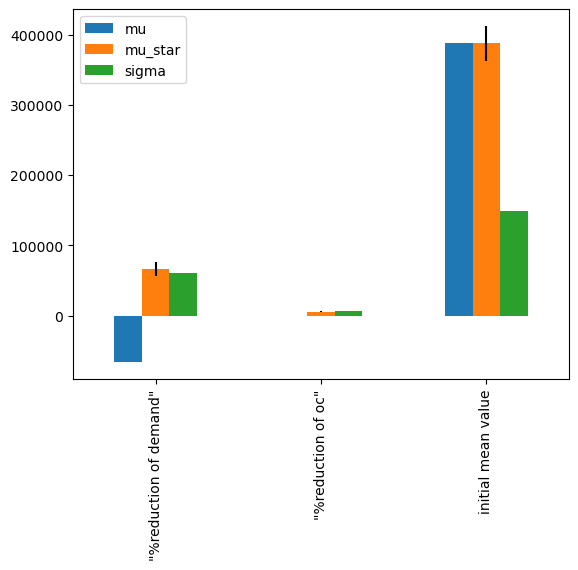

In [22]:
Si.plot()

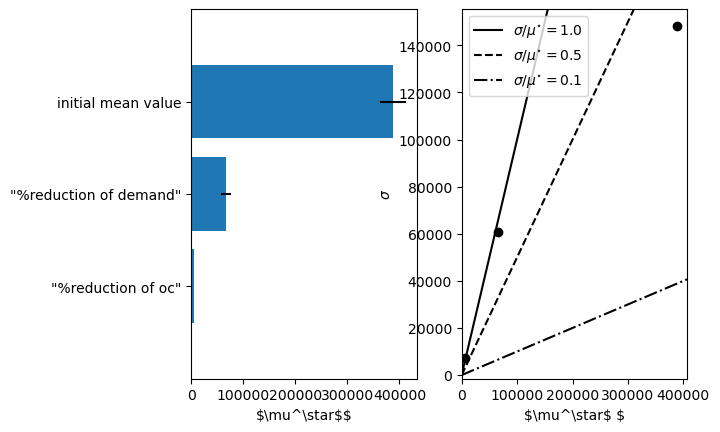

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
horizontal_bar_plot(ax1, Si, {}, sortby="mu_star", unit=r"$")
covariance_plot(ax2, Si, {}, unit=r"$")

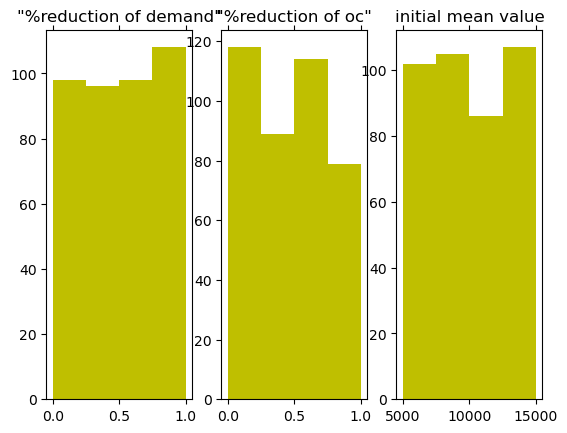

In [12]:
fig2 = plt.figure()
sample_histograms(fig2, X, problem, {"color": "y"})
plt.show()

In [71]:
problem2 = {
    'num_vars': 2,
    'names': ['"%reduction of demand"', '"%reduction of oc"'],
    'bounds': [[0, 1]]*2,
    'groups': None,
}

In [72]:
X,Y = evaluate_model(problem2, model_parameter, ['production rate'])

print(Y)

[8044.08660676 7982.81842402 8670.99414462 8346.00612615 8432.1966707
 7692.18598742 8007.9305182  8727.16555524 8759.28335449 8423.752954
 8382.00613585 7720.0429404  7729.39586426 8367.14793487 8407.93807141
 8065.71298632 7978.89975193 8703.36963144 8376.88905189 8402.87094104
 7684.99012888 8389.71104682 8396.57029169 7666.71078475 8380.51016925
 8368.15691056 7717.8248277  8369.08894254 7696.12094377 7763.98211405
 7769.02632465 7792.65309332 8379.69431761 7677.00565949 8369.59219357
 8366.9786248  7759.77903061 7678.82640842 8406.50709339 8031.12964699
 8682.03743579 8711.80102088 7995.57137939 8722.79343909 8729.0142344
 8399.2780344  8427.81715778 7718.97135996 8080.83356592 8634.97180096
 8680.0528388  8693.73223603 8036.09651313 8015.84472239 8056.79677842
 8723.45235981 8642.81379119 8083.80940187 8709.87987671 8750.84177783
 8022.52725326 8653.75972091 8748.36735319 7679.97513634 8380.09512363
 8364.87149712 7718.11685653 7682.54559687 8356.35274805 8364.02105593
 7747.8349

In [73]:
Si = morris.analyze(
    problem,
    X,
    Y,
    conf_level=0.95,
    print_to_console=True,
    num_levels=4,
    num_resamples=100,
)

                                mu     mu_star      sigma  mu_star_conf
"%reduction of demand" -997.002848  997.002848  66.020186     14.176369
"%reduction of oc"       10.440931   53.443156  65.845426      7.010917


<Axes: >

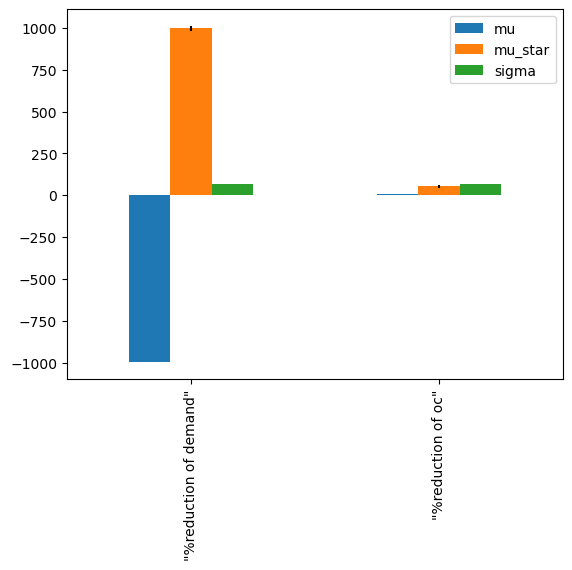

In [74]:
Si.plot()